In [229]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

%matplotlib inline

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [84]:
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import metrics 

In [176]:
basedir = os.getcwd()
datadir = basedir + '/data'

data = pd.read_csv(datadir + '/X_processed.csv', low_memory = False, index_col = 0)
y_predict = pd.read_csv(datadir + '/y_processed.csv', low_memory = False, index_col = 0)
y_predict2 = pd.read_csv(datadir + '/y2_processed.csv', low_memory = False, index_col = 0)

features = pd.read_csv(datadir + '/features_processed.csv',index_col = 0)
OTU = pd.read_csv(datadir + '/OTU_processed.csv',index_col = 0)
labels = pd.read_csv(datadir + '/labels_processed.csv',index_col = 0)
OTUref = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)

In [234]:
Stool.shape

(845, 1896)

In [28]:
labels

,Unnamed: 0,SubjectID,#SampleID,BodySite,Preterm
0,1,10005,1000501278,Vaginal_Swab,0
1,6,10003,1000301298,Vaginal_Swab,0
2,7,10003,1000301308,Vaginal_Swab,0
3,8,10003,1000301318,Vaginal_Swab,0
4,9,10004,1000401368,Vaginal_Swab,0
...,...,...,...,...,...
3876,4396,10046,1004604448.rs,Tooth_Gum,0
3877,4397,10101,1010104488.rs,Tooth_Gum,1
3878,4398,10024,1002402218.ca2.rs,Stool,0
3879,4399,10023,1002302248.bn1.rs,Stool,0


In [209]:
OTU = OTU.drop(['BodySite'],axis=1)

In [210]:
X = OTU
y = labels['Preterm']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Accuracy:  78.8931788931789
f1:  42.25352112676056
precision:  71.42857142857143
recall:  30.0


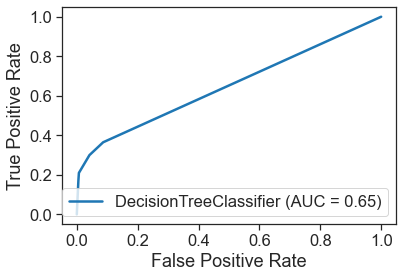

In [250]:
# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(random_state=0,max_depth = 4) 
dectree.fit(X_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(X_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_test, y_pred_dectree)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_test, y_pred_dectree)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_test, y_pred_dectree)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

metrics.plot_roc_curve(dectree, X_test, y_test)

In [155]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=OTU.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/OTUtree.txt","w+")
f.write(dot_data)
f.close()

In [161]:
vaginal_bacteria

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUId,,,,,,,
OTU_665,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN
OTU_1790,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Gardnerella,NaN
OTU_839,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Gardnerella,NaN
OTU_736,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN
OTU_300,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN
OTU_37,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN
OTU_301,Bacteria,Tenericutes,Mollicutes,Mycoplasmatales,Mycoplasmataceae,Mycoplasma,NaN
OTU_4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN
OTU_401,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
Saliva

,OTU_25,OTU_38,OTU_233,OTU_962,OTU_168,OTU_1330,OTU_3,OTU_153,OTU_4,OTU_1123,OTU_135,OTU_360,OTU_42,OTU_537,OTU_125,OTU_1614,OTU_73,OTU_1,OTU_335,OTU_1359,OTU_2,OTU_237,OTU_50,OTU_40,OTU_1408,OTU_21,OTU_24,OTU_381,OTU_191,OTU_443,OTU_839,OTU_1142,OTU_1430,OTU_7,OTU_150,OTU_81,OTU_94,OTU_137,OTU_8,OTU_6,OTU_15,OTU_598,OTU_123,OTU_1332,OTU_32,OTU_626,OTU_1333,OTU_30,OTU_665,OTU_339,...,OTU_1882,OTU_1597,OTU_915,OTU_1172,OTU_1683,OTU_953,OTU_1551,OTU_1677,OTU_1856,OTU_732,OTU_1884,OTU_1413,OTU_797,OTU_1855,OTU_1297,OTU_1639,OTU_1246,OTU_1433,OTU_1568,OTU_1801,OTU_1894,OTU_1385,OTU_1846,OTU_1470,OTU_1835,OTU_491,OTU_325,OTU_644,OTU_860,OTU_1431,OTU_738,OTU_1395,OTU_1826,OTU_1892,OTU_1812,OTU_1625,OTU_1633,OTU_1343,OTU_1827,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382,BodySite
222,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,391,0,17,0,4,12,0,0,0,45,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
223,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,0,323,0,8,0,0,33,0,0,0,113,0,0,1,0,0,0,9,0,0,0,0,0,0,1,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
224,0,0,0,0,0,1,0,0,0,0,0,0,19,1,0,0,0,433,0,3,0,3,6,0,0,0,64,0,0,1,0,0,0,13,0,0,0,0,0,2,7,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
225,0,0,0,0,0,9,0,0,0,0,0,0,19,0,0,0,0,162,0,0,0,4,0,0,0,0,3,0,0,0,0,0,0,25,0,0,0,9,1,35,1,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
226,0,0,0,0,0,15,0,0,0,0,0,0,19,0,0,0,0,83,0,0,0,1,0,0,0,0,14,0,0,0,0,0,0,18,0,0,0,1,1,22,0,0,0,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,0,0,0,0,0,3,1,0,0,0,0,0,54,0,0,0,0,909,0,1,0,1,7,0,0,0,223,0,0,0,0,0,0,99,0,0,0,0,10,121,9,0,0,78,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
4331,0,0,0,0,0,1,0,0,0,0,0,0,32,0,0,0,0,388,0,2,0,1,1,0,0,0,100,0,0,0,0,0,0,19,0,0,0,0,11,36,4,0,0,46,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
4332,0,0,0,0,0,3,0,0,0,0,0,0,69,0,0,0,0,552,0,2,0,3,2,0,0,0,86,0,0,0,0,0,0,25,0,0,0,0,86,16,24,0,0,132,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva
4333,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,916,0,2,0,1,8,0,0,0,82,0,0,0,0,0,0,64,0,0,0,0,98,10,66,0,0,13,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saliva


In [236]:
bacteria = OTUref.loc[['OTU_206','OTU_21','OTU_260','OTU_1029','OTU_665','OTU_38',
            'OTU_1393','OTU_61','OTU_49','OTU_123']]
bacteria = bacteria[['Family','Genus']]
bacteria.to_csv(datadir + '/bacteria.csv')

In [214]:
body_label['BodySite'].value_counts()

BodySite            BodySite          
Back_of_ear_L       Back_of_ear_L           29
Back_of_ear_R       Back_of_ear_R           18
Cord Blood (Serum)  Cord Blood (Serum)      20
Elbow_crease_R      Elbow_crease_R          14
Saliva              Saliva                 996
Stool               Stool                  845
Tooth_Gum           Tooth_Gum              936
Urine               Urine                   19
Vaginal_Swab        Vaginal_Swab          1004
Name: BodySite, dtype: int64

In [164]:
vaginal_bacteria = OTUref.loc[['OTU_665','OTU_1790','OTU_839','OTU_736','OTU_300','OTU_37',
            'OTU_301','OTU_4','OTU_401','OTU_19','OTU_179','OTU_174','OTU_126']]
vaginal_bacteria = vaginal_bacteria[['Family','Genus']]
vaginal_bacteria.to_csv(datadir + '/vaginal_bacteria.csv')

In [185]:
body_label = labels.groupby('BodySite')

vaginal_swab_label = body_label.get_group("Vaginal_Swab")
skin_label = body_label.get_group("Back_of_ear_L")
skin_label += body_label.get_group("Back_of_ear_R")
Cord_Blood_label = body_label.get_group("Cord Blood (Serum)")
skin_label += body_label.get_group("Elbow_crease_R")
Saliva_label = body_label.get_group("Saliva")
Stool_label = body_label.get_group("Stool")
Tooth_Gum_label = body_label.get_group("Tooth_Gum")
Urine_label = body_label.get_group("Urine")

body_labels = [vaginal_swab_label,Cord_Blood_label,Saliva_label,Stool_label,Tooth_Gum_label, Urine_label]

In [194]:
body_parts = ['vagina','Cord Blood','Saliva','Stool','Tooth and Gum','Urine']

In [186]:
body_group = OTU.groupby('BodySite')
body_group['BodySite'].value_counts()

vaginal_swab = body_group.get_group("Vaginal_Swab")
skin = body_group.get_group("Back_of_ear_L")
skin += body_group.get_group("Back_of_ear_R")
Cord_Blood = body_group.get_group("Cord Blood (Serum)")
skin += body_group.get_group("Elbow_crease_R")
Saliva = body_group.get_group("Saliva")
Stool = body_group.get_group("Stool")
Tooth_Gum = body_group.get_group("Tooth_Gum")
Urine = body_group.get_group("Urine")

body_features = [vaginal_swab,Cord_Blood,Saliva,Stool,Tooth_Gum]
body_parts = ['vagina','Cord Blood','Saliva','Stool','Tooth and Gum','Urine']

In [187]:
skin_label = skin_label.drop(['BodySite'],axis=1)

Accuracy:  85.57213930348259
f1:  64.19753086419753
precision:  100.0
recall:  47.27272727272727
Accuracy:  50.0
f1:  0.0
precision:  0.0
recall:  0.0
Accuracy:  80.5
f1:  57.14285714285714
precision:  81.25
recall:  44.06779661016949
Accuracy:  88.75739644970415
f1:  65.45454545454545
precision:  94.73684210526315
recall:  50.0
Accuracy:  85.1063829787234
f1:  63.15789473684211
precision:  72.72727272727273
recall:  55.81395348837209
Accuracy:  100.0
f1:  0.0
precision:  0.0
recall:  0.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/py

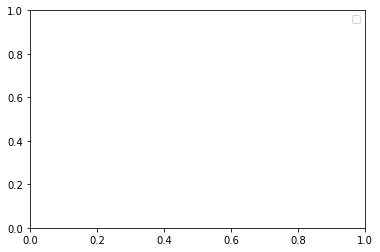

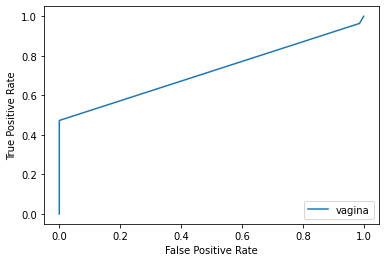

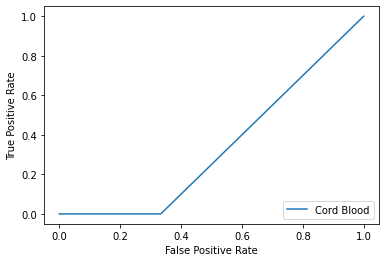

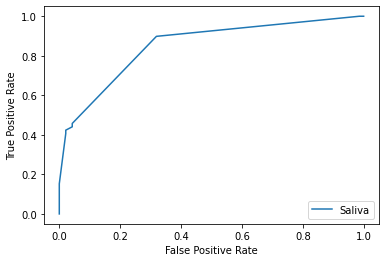

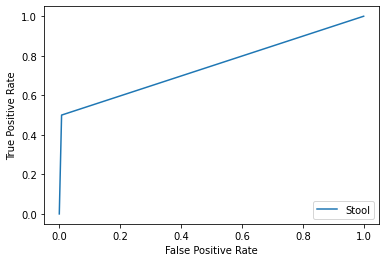

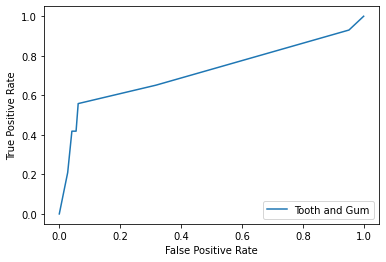

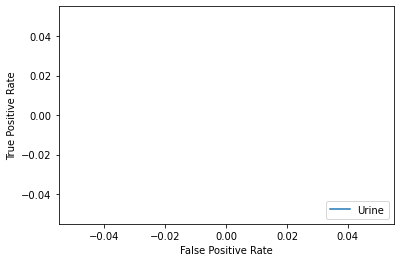

In [204]:
ax = plt.gca()
for i in range(len(body_labels)):
    
    #body_features[i] = body_features[i].drop(['BodySite'],axis=1)
    
    X = body_features[i]
    y = body_labels[i]['Preterm']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # This is where we set our machine learning algorithm type - Decision Tree
    dectree = DecisionTreeClassifier(random_state=0,max_depth = 4) 
    dectree.fit(X_train,y_train.values.ravel())

    # Use the model to make predictions using our testing input data
    y_pred_dectree = dectree.predict(X_test)

    # Calculate the accuracy of the model as a percent
    accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
    accuracy_percentage = 100 * accuracy
    print('Accuracy: ',accuracy_percentage)

    # Calculate the f1 of the model as a percent
    f1 = metrics.f1_score(y_test, y_pred_dectree)
    f1_percentage = 100 * f1
    print('f1: ',f1_percentage)

    # Calculate the precision of the model as a percent
    precision = metrics.precision_score(y_test, y_pred_dectree)
    precision_percentage = 100 * precision
    print('precision: ',precision_percentage)

    # Calculate the recall of the model as a percent
    recall = metrics.recall_score(y_test, y_pred_dectree)
    recall_percentage = 100 * recall
    print('recall: ',recall_percentage)
    
    plot_roc_curve(dectree, X_test, y_test, label = body_parts[i])
    
leg = ax.legend()

In [220]:
Stool.shape

(845, 1896)

In [221]:
Stool_label.shape

(845, 4)

In [222]:
# splitting data
#Stool = Stool.drop(['BodySite'],axis=1)
X_stool = Stool
y_stool = Stool_label['Preterm']
X_stool_train, X_stool_test, y_stool_train, y_stool_test = train_test_split(X_stool, y_stool, test_size=0.20)

In [248]:
# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree3 = DecisionTreeClassifier(random_state=0,max_depth = 5) 
dectree3.fit(X_stool_train,y_stool_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree3 = dectree3.predict(X_stool_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_stool_test, y_pred_dectree3)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_stool_test, y_pred_dectree3)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_stool_test, y_pred_dectree3)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_stool_test, y_pred_dectree3)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=Stool.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/stooltree.txt","w+")
f.write(dot_data)
f.close()

Accuracy:  89.94082840236686
f1:  72.1311475409836
precision:  100.0
recall:  56.41025641025641


In [143]:
# splitting data
X_vagina = vaginal_swab
y_vagina = vaginal_label['Preterm']
X_vagina_train, X_vagina_test, y_vagina_train, y_vagina_test = train_test_split(X_vagina, y_vagina, test_size=0.20)

In [242]:
# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# This is where we set our machine learning algorithm type - Decision Tree
dectree2 = DecisionTreeClassifier(random_state=0,max_depth = 5) 
dectree2.fit(X_vagina_train,y_vagina_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree2 = dectree2.predict(X_vagina_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_vagina_test, y_pred_dectree2)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# Calculate the f1 of the model as a percent
f1 = metrics.f1_score(y_vagina_test, y_pred_dectree2)
f1_percentage = 100 * f1
print('f1: ',f1_percentage)

# Calculate the precision of the model as a percent
precision = metrics.precision_score(y_vagina_test, y_pred_dectree2)
precision_percentage = 100 * precision
print('precision: ',precision_percentage)

# Calculate the recall of the model as a percent
recall = metrics.recall_score(y_vagina_test, y_pred_dectree2)
recall_percentage = 100 * recall
print('recall: ',recall_percentage)

Accuracy:  81.59203980099502
f1:  60.215053763440864
precision:  90.32258064516128
recall:  45.16129032258064


In [139]:
dot_data = tree.export_graphviz(dectree,out_file=None,feature_names=vaginal_swab.columns,class_names=['Not Preterm','Preterm'])
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open(basedir + "/figures/vaginaltree.txt","w+")
f.write(dot_data)
f.close()

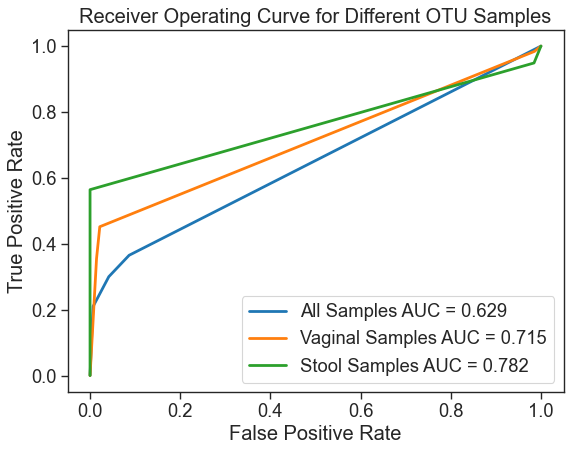

In [260]:
from sklearn.metrics import plot_roc_curve
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
classifiers = [dectree,dectree2]
ax = plt.gca()
plot_roc_curve(dectree, X_test, y_test, ax=ax, label = "All Samples AUC = "+str(round(auc,3)))
plot_roc_curve(dectree2, X_vagina_test, y_vagina_test, ax=ax, label = 'Vaginal Samples AUC = '+str(round(vaginal_auc,3)))
plot_roc_curve(dectree3, X_stool_test, y_stool_test, ax=ax, label = 'Stool Samples AUC = '+str(round(stool_auc,3)))
leg = ax.legend()
plt.title("Receiver Operating Curve for Different OTU Samples")

plt.savefig(basedir + '/figures/roc.png',bbox_inches = 'tight')

In [152]:
OTUref.loc[['OTU_665','OTU_1790','OTU_839','OTU_736','OTU_300','OTU_301','OTU_4']]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUId,,,,,,,
OTU_665,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,NaN
OTU_1790,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Gardnerella,NaN
OTU_839,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Gardnerella,NaN
OTU_736,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN
OTU_300,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN
OTU_301,Bacteria,Tenericutes,Mollicutes,Mycoplasmatales,Mycoplasmataceae,Mycoplasma,NaN
OTU_4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NaN


In [240]:
vaginal_bacteria

,Family,Genus
OTUId,,
OTU_665,Prevotellaceae,Prevotella
OTU_1790,Bifidobacteriaceae,Gardnerella
OTU_839,Bifidobacteriaceae,Gardnerella
OTU_736,Lactobacillaceae,Lactobacillus
OTU_300,NaN,NaN
OTU_37,Prevotellaceae,Prevotella
OTU_301,Mycoplasmataceae,Mycoplasma
OTU_4,Lactobacillaceae,Lactobacillus
OTU_401,NaN,NaN


In [247]:
# calculating vaginal auc
fpr_vag, tpr_vag, thresholds_vag = metrics.roc_curve(y_vagina_test,y_pred_dectree2)
vaginal_auc = metrics.auc(fpr_vag,tpr_vag)
print(vaginal_auc)

0.7150150847064284


In [249]:
# calculating stool auc
fpr_stool, tpr_stool, thresholds_stool = metrics.roc_curve(y_stool_test,y_pred_dectree3)
stool_auc = metrics.auc(fpr_stool,tpr_stool)
print(stool_auc)

0.782051282051282


In [251]:
# calculating all samples auc
fpr, tpr, thresholds_stool = metrics.roc_curve(y_test,y_pred_dectree)
auc = metrics.auc(fpr,tpr)
print(auc)

0.6292027729636048


In [263]:
metrics.plot_precision_recall_curve(y_test, y_pred_dectree)

TypeError: plot_precision_recall_curve() missing 1 required positional argument: 'y'

In [261]:
bacteria

,Family,Genus
OTUId,,
OTU_206,Leptotrichiaceae,NaN
OTU_21,Coriobacteriaceae,NaN
OTU_260,Veillonellaceae,Veillonella
OTU_1029,Bacteroidaceae,Bacteroides
OTU_665,Prevotellaceae,Prevotella
OTU_38,Staphylococcaceae,Staphylococcus
OTU_1393,Leptotrichiaceae,Leptotrichia
OTU_61,Mycoplasmataceae,Ureaplasma
OTU_49,Prevotellaceae,Prevotella
